epoch 1, loss 0.0049, train acc 0.832, test acc 0.897
epoch 2, loss 0.0036, train acc 0.898, test acc 0.904
epoch 3, loss 0.0036, train acc 0.903, test acc 0.910
epoch 4, loss 0.0035, train acc 0.906, test acc 0.911
epoch 5, loss 0.0035, train acc 0.908, test acc 0.910
epoch 6, loss 0.0035, train acc 0.908, test acc 0.913
epoch 7, loss 0.0035, train acc 0.908, test acc 0.913
epoch 8, loss 0.0035, train acc 0.909, test acc 0.915
epoch 9, loss 0.0035, train acc 0.909, test acc 0.915
epoch 10, loss 0.0035, train acc 0.908, test acc 0.916
epoch 11, loss 0.0035, train acc 0.908, test acc 0.912
epoch 12, loss 0.0035, train acc 0.909, test acc 0.910


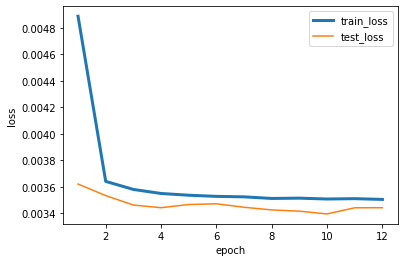

In [1]:
import torch
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pyplot as plt

mnist_train = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, download=True, transform=transforms.ToTensor())

batch_size = 200
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens,dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs,dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad = True


def relu(X):
    return torch.max(input = X, other=torch.tensor(0.0))


def net(X):
    X = X.view(-1, num_inputs)
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2


def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size


def evaluate_accuracy(data_iter, net):
    acc_sum = 0.0
    n = 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim = 1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n


def l2_penalty(W1, W2):  # 定义L2范数惩罚项
    return (W1 ** 2).sum() / 2 + (W2 ** 2).sum() / 2


loss = torch.nn.CrossEntropyLoss()

num_epochs, lr = 12, 50.0
lambd = 0.02    # 定义超参数lambd


def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params , lr, lambd):
    train_ls, test_ls, x_epoch = [], [], []
    for epoch in range(num_epochs):
        train_1_sum = 0.0
        train_1_test_sum = 0.0
        train_acc_sum = 0.0
        n = 0
        n_test = 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y) + lambd * l2_penalty(W1, W2)    #添加惩罚项
            l = l.sum()
            if params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            sgd(params, lr, batch_size)

            train_1_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim =1) == y).sum().item()
            n += y.shape[0]
        train_ls.append(train_1_sum / n)
        x_epoch.append(epoch + 1)
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_1_sum / n, train_acc_sum / n, test_acc))

        for X_test, y_test in test_iter:
            y_hat = net(X_test)
            l = loss(y_hat, y_test) + lambd * l2_penalty(W1, W2)
            l = l.sum()
            train_1_test_sum += l.item()
            n_test += y_test.shape[0]
        test_ls.append(train_1_test_sum / n_test)

    plt.plot(x_epoch, train_ls, label="train_loss", linewidth=3)
    plt.plot(x_epoch, test_ls, label="test_loss", linewidth=1.5)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()


train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr, lambd)

epoch 1, loss 0.0063, train acc 0.637, test acc 0.819
epoch 2, loss 0.0032, train acc 0.835, test acc 0.863
epoch 3, loss 0.0026, train acc 0.863, test acc 0.881
epoch 4, loss 0.0023, train acc 0.877, test acc 0.891
epoch 5, loss 0.0021, train acc 0.886, test acc 0.898
epoch 6, loss 0.0020, train acc 0.892, test acc 0.904
epoch 7, loss 0.0019, train acc 0.897, test acc 0.907
epoch 8, loss 0.0019, train acc 0.900, test acc 0.908
epoch 9, loss 0.0018, train acc 0.903, test acc 0.912
epoch 10, loss 0.0018, train acc 0.905, test acc 0.913
epoch 11, loss 0.0017, train acc 0.907, test acc 0.915
epoch 12, loss 0.0017, train acc 0.910, test acc 0.916


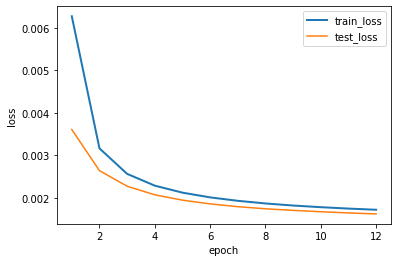

In [2]:
import torch.nn as nn
from torch.nn import init
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

mnist_train = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, download=True, transform=transforms.ToTensor())

batch_size = 200
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

num_inputs, num_outputs, num_hiddens = 784, 10, 256


class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()

    def forward(self, x):
        return x.view(x.shape[0], -1)


net = nn.Sequential(
     FlattenLayer(),
     nn.Linear(num_inputs, num_hiddens),
     nn.ReLU(),
     nn.Linear(num_hiddens, num_outputs),
     )

for params in net.parameters():
    init.normal_(params, mean=0, std=0.1)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, weight_decay=0.01)


def evaluate_accuracy(test_iter, net):
    acc_sum, n = 0, 0
    for X, y in test_iter:
        y_hat = net(X)
        acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    return acc_sum / n


num_epochs = 12


def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer):
    train_ls, test_ls, x_epoch = [], [], []
    for epoch in range(num_epochs):
        train_1_sum, train_acc_sum, n = 0.0, 0.0, 0
        train_1_test_sum, n_test = 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            train_1_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        train_ls.append(train_1_sum / n)
        x_epoch.append(epoch + 1)
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_1_sum / n, train_acc_sum / n, test_acc))

        for X_test, y_test in test_iter:
            y_hat = net(X_test)
            l = loss(y_hat, y_test).sum()
            train_1_test_sum += l.item()
            n_test += y_test.shape[0]
        test_ls.append(train_1_test_sum / n_test)


    plt.plot(x_epoch, train_ls, label="train_loss", linewidth=2)
    plt.plot(x_epoch, test_ls, label="test_loss", linewidth=1.5)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()


train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)